## BASIC STATISTICS
#### Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset


Introduction
●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.


Descriptive Analytics for Numerical Columns
●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.
●	Steps:
	Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
	Identify numerical columns in the dataset.
	Calculate the mean, median, mode, and standard deviation for these columns.
	Provide a brief interpretation of these statistics.


In [75]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Akshata\OneDrive\Desktop\Assignment\Basic stats - 1\sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.50120
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.89704
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.08980
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.92530
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.05377


In [77]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495426,47847.912855
max,31.000000,60100.000000,196400.000000,19.992407,25738.022190,179507.479000


In [79]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to store descriptive statistics
descriptive_stats = {}

In [9]:
# Calculate mean, median, mode, and standard deviation for each numerical column
for col in numerical_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]  # Get the first mode if there are multiple
    std_dev = df[col].std()
    
    descriptive_stats[col] = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Standard Deviation': std_dev
    }


In [11]:
# Create a DataFrame to display the descriptive statistics
df = pd.DataFrame(descriptive_stats).T
print("\nDescriptive Statistics:")
print(df)

# Interpretation
print("\nInterpretation:")
for col in df.index:
    print(f"\nColumn: {col}")
    print(f"Mean: {df.loc[col, 'Mean']}")
    print(f"Median: {df.loc[col, 'Median']}")
    print(f"Mode: {df.loc[col, 'Mode']}")
    print(f"Standard Deviation: {df.loc[col, 'Standard Deviation']}")


Descriptive Statistics:
           Mean  Median  Mode  Standard Deviation
xbox    4.02355     4.0   4.0            1.913212
ybox    7.03550     7.0   9.0            3.304555
width   5.12185     5.0   5.0            2.014573
height  5.37245     6.0   6.0            2.261390
onpix   3.50585     3.0   2.0            2.190458
xbar    6.89760     7.0   7.0            2.026035
ybar    7.50045     7.0   7.0            2.325354
x2bar   4.62860     4.0   3.0            2.699968
y2bar   5.17865     5.0   5.0            2.380823
xybar   8.28205     8.0   7.0            2.488475
x2ybar  6.45400     6.0   6.0            2.631070
xy2bar  7.92900     8.0   8.0            2.080619
xedge   3.04610     3.0   3.0            2.332541
xedgey  8.33885     8.0   8.0            1.546722
yedge   3.69175     3.0   4.0            2.567073
yedgex  7.80120     8.0   8.0            1.617470

Interpretation:

Column: xbox
Mean: 4.02355
Median: 4.0
Mode: 4.0
Standard Deviation: 1.9132115451305751

Column: ybox
Mean:

Data Visualization
●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.
●	Histograms:
	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.
●	Boxplots:
	Create boxplots for numerical variables to identify outliers and the interquartile range.
	Discuss any findings, such as extreme values or unusual distributions.


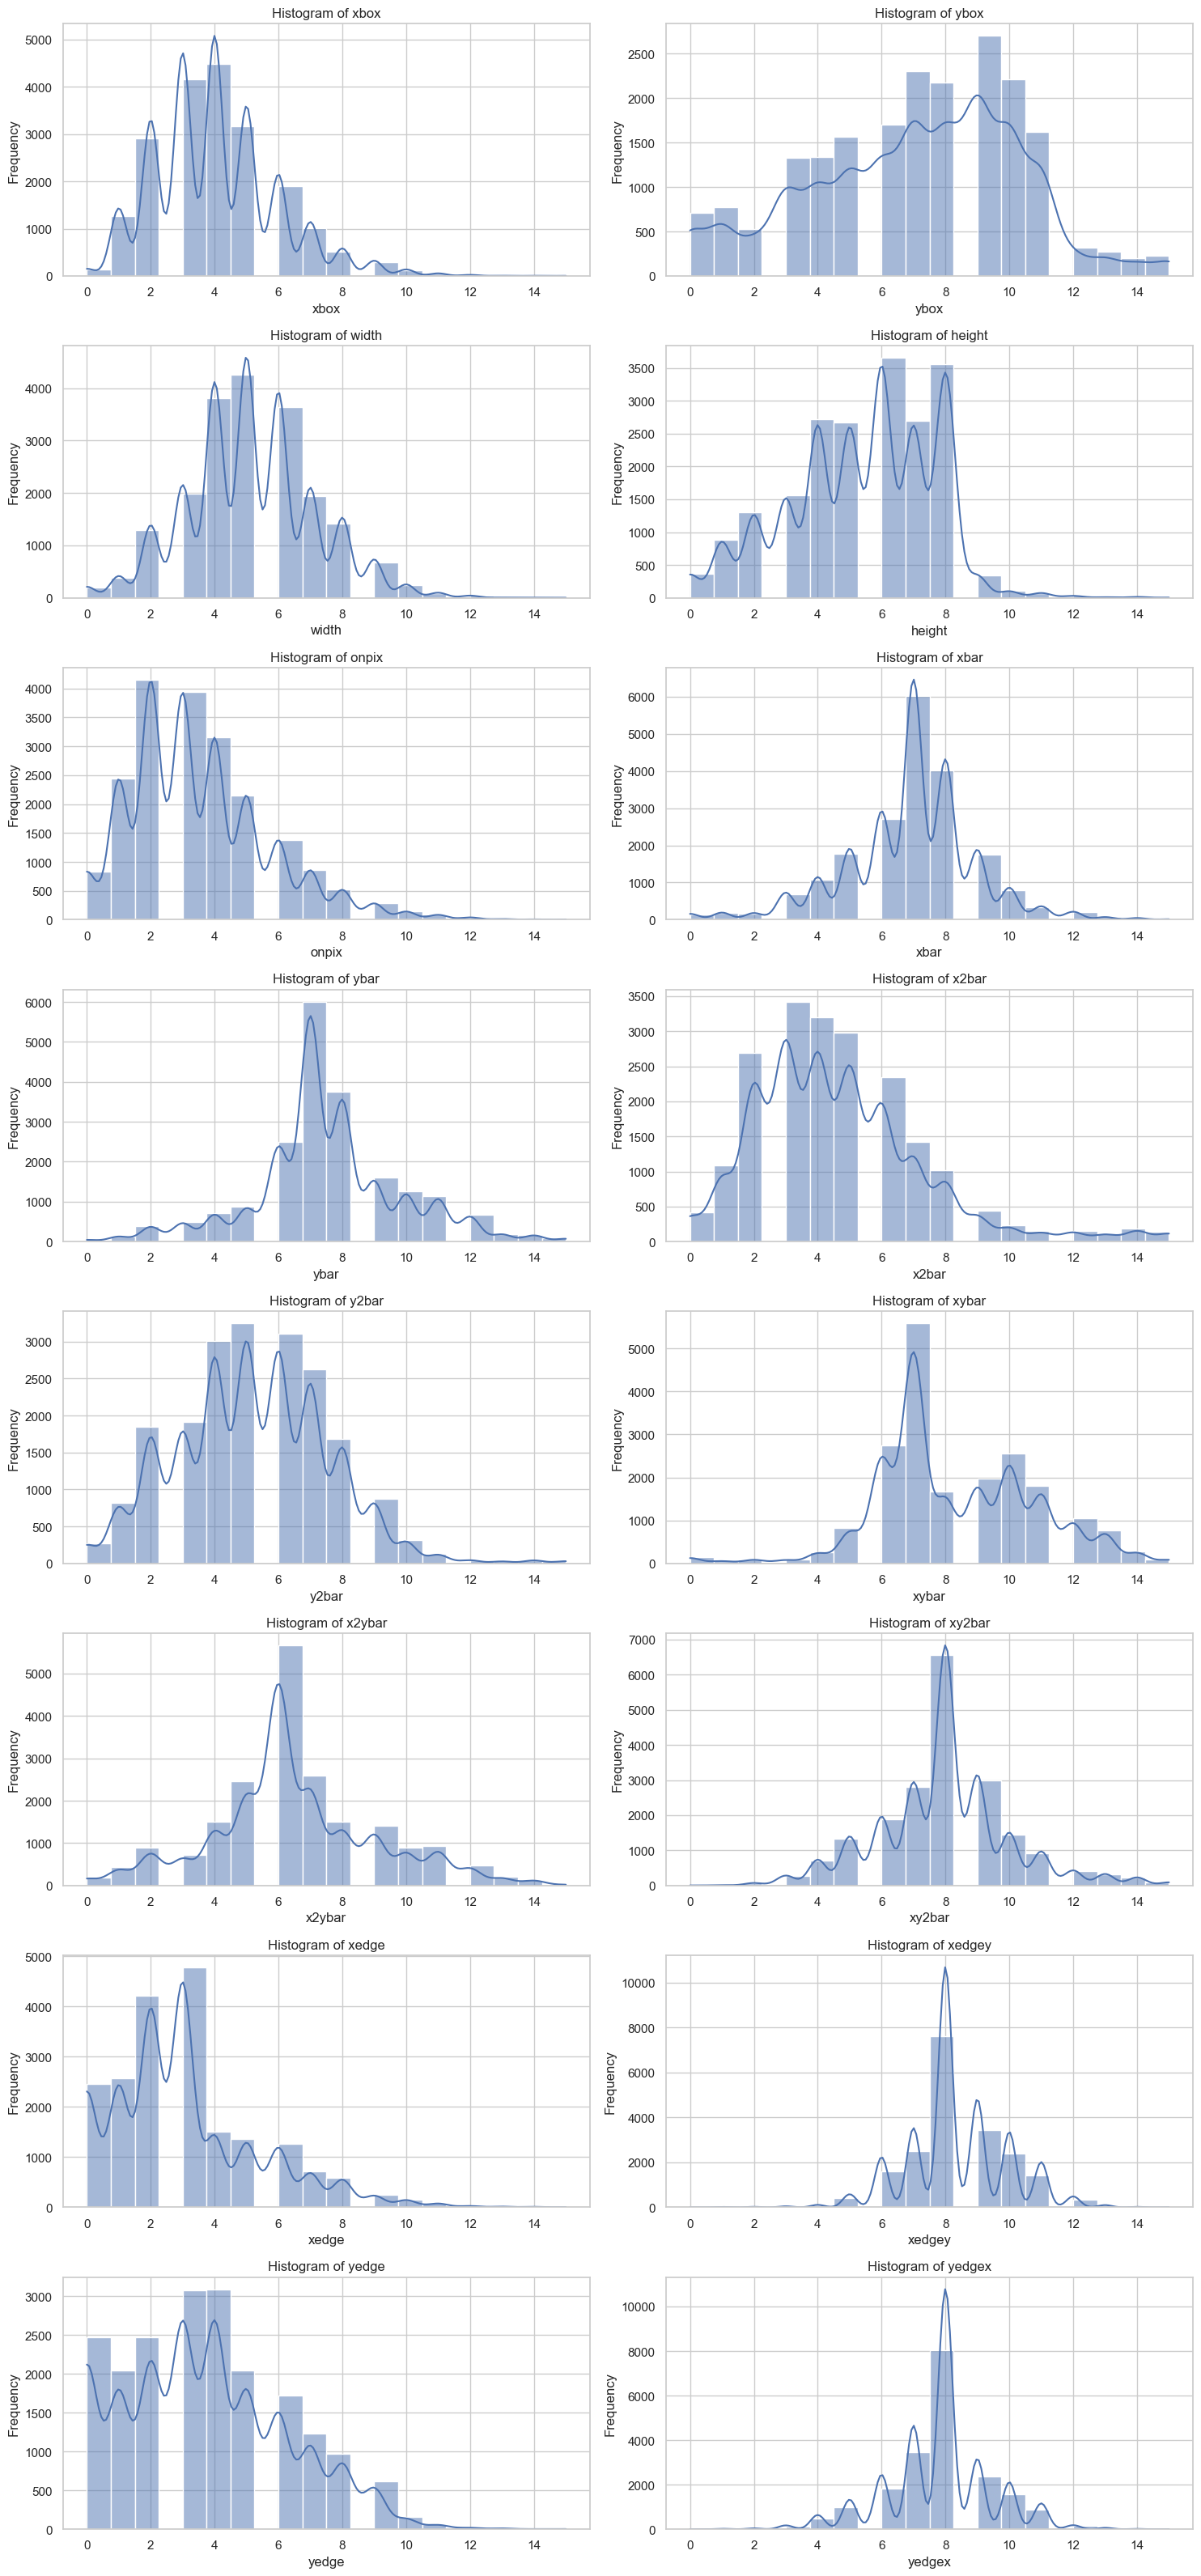

In [49]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set style for seaborn
sns.set(style="whitegrid")

# Function to plot histograms for numerical columns
def plot_histograms(data, numerical_cols):
    num_cols = len(numerical_cols)
    cols = 2  # Define how many columns you want for the subplots
    rows = (num_cols + cols - 1) // cols  # Calculate the number of rows needed
    
    plt.figure(figsize=(15, 4 * rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(rows,cols, i + 1)
        sns.histplot(data[col], bins=20, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
plot_histograms(df, numerical_cols)

In [59]:
for i,col in enumerate(numerical_cols):
    #skewness of each columns
    print('Skew of the %s: %f' % (col, df[col].skew()))
        #kurtosis of each columns
    print('Kurtosis of the %s: %f' % (col, df[col].kurtosis()))

Skew of the xbox: 0.715056
Kurtosis of the xbox: 0.882928
Skew of the ybox: -0.227967
Kurtosis of the ybox: -0.421179
Skew of the width: 0.234941
Kurtosis of the width: 0.304182
Skew of the height: -0.278249
Kurtosis of the height: -0.249434
Skew of the onpix: 0.943373
Kurtosis of the onpix: 1.190194
Skew of the xbar: -0.310079
Kurtosis of the xbar: 1.493437
Skew of the ybar: 0.093471
Kurtosis of the ybar: 0.953907
Skew of the x2bar: 1.159975
Kurtosis of the x2bar: 2.075245
Skew of the y2bar: 0.286934
Kurtosis of the y2bar: 0.329941
Skew of the xybar: 0.090078
Kurtosis of the xybar: 0.323985
Skew of the x2ybar: 0.288168
Kurtosis of the x2ybar: 0.329447
Skew of the xy2bar: 0.273728
Kurtosis of the xy2bar: 1.007517
Skew of the xedge: 1.057288
Kurtosis of the xedge: 1.241373
Skew of the xedgey: 0.049198
Kurtosis of the xedgey: 0.887681
Skew of the yedge: 0.468343
Kurtosis of the yedge: -0.306190
Skew of the yedgex: -0.199507
Kurtosis of the yedgex: 1.120773


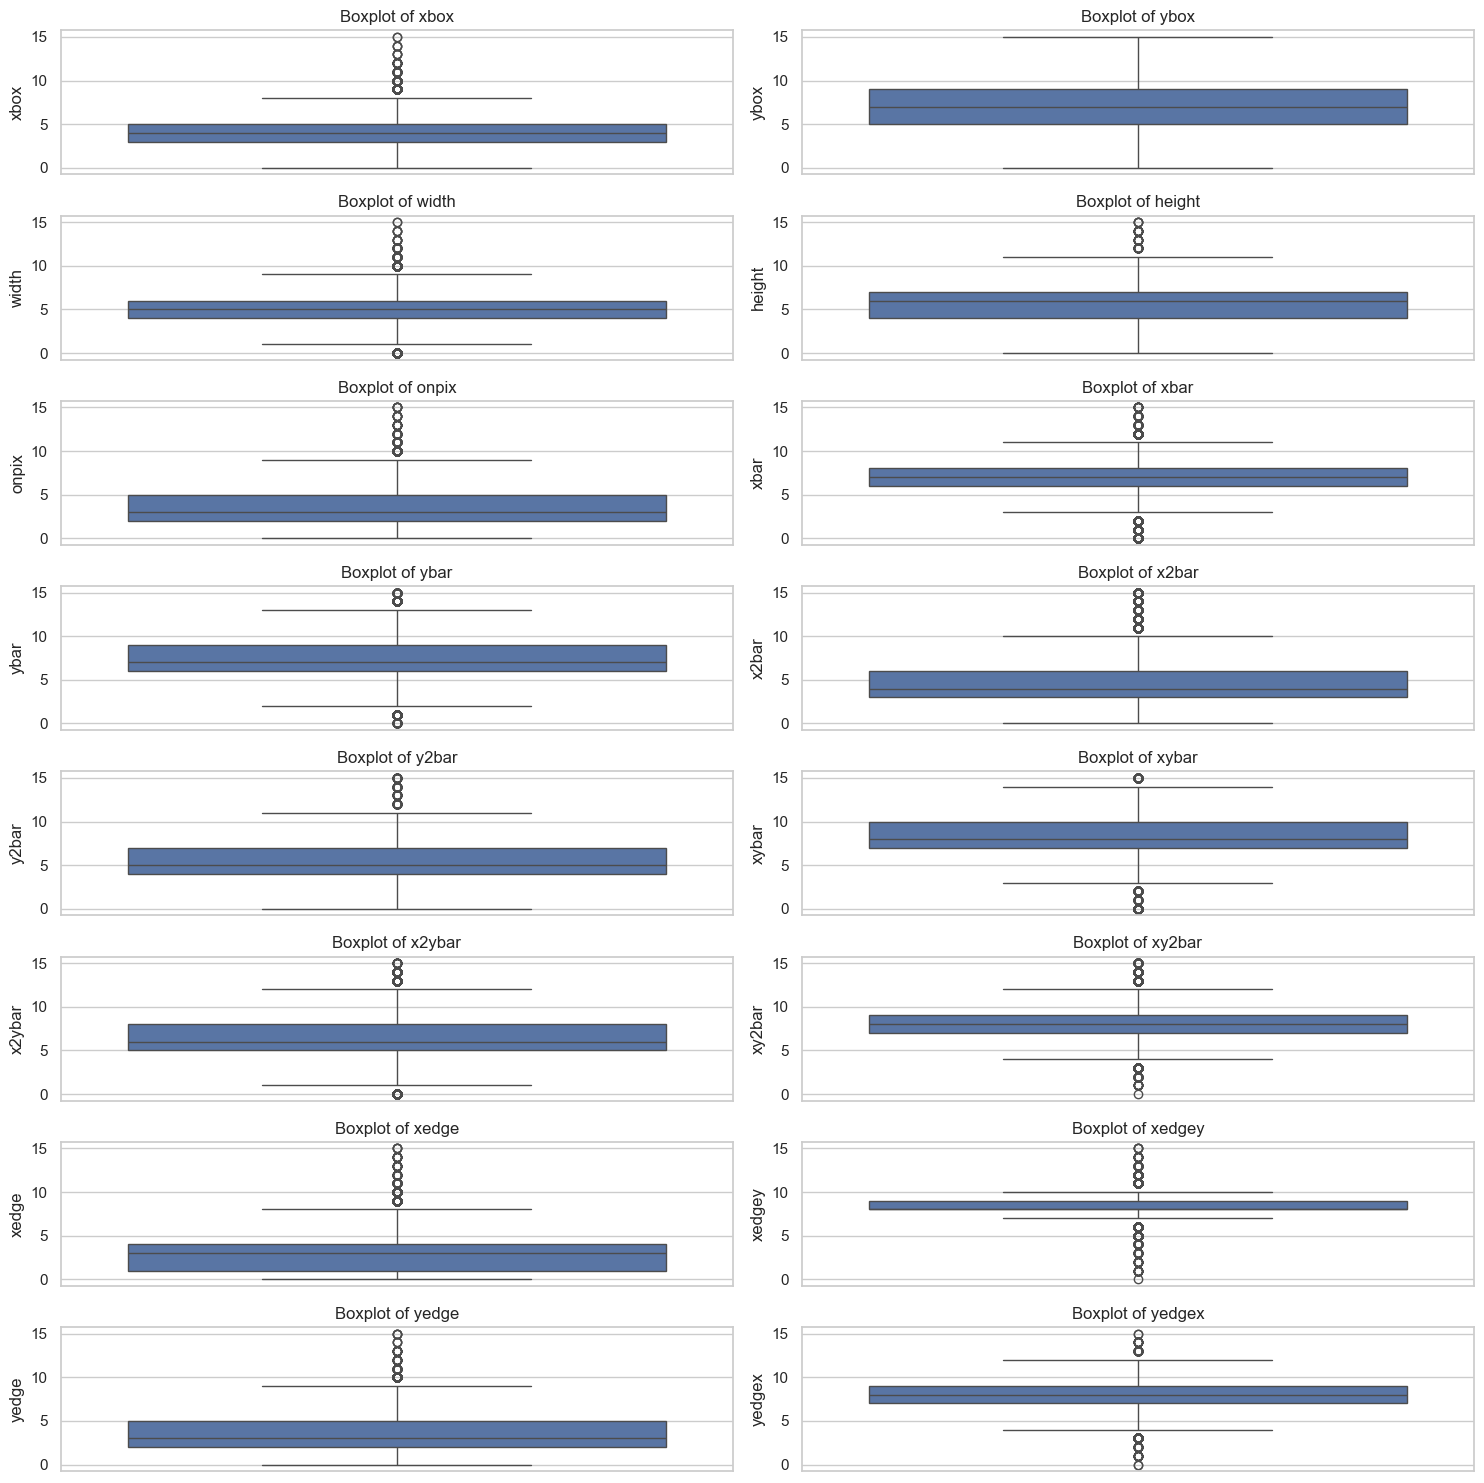

In [41]:
# Function to plot boxplots for numerical columns
def plot_boxplots(data, numerical_cols):
    plt.figure(figsize=(15, 15))
    for i, col in enumerate(numerical_cols):
        plt.subplot((len(numerical_cols) + 1) // 2, 2, i + 1)
        sns.boxplot(y=data[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Plot boxplots
plot_boxplots(df, numerical_cols)

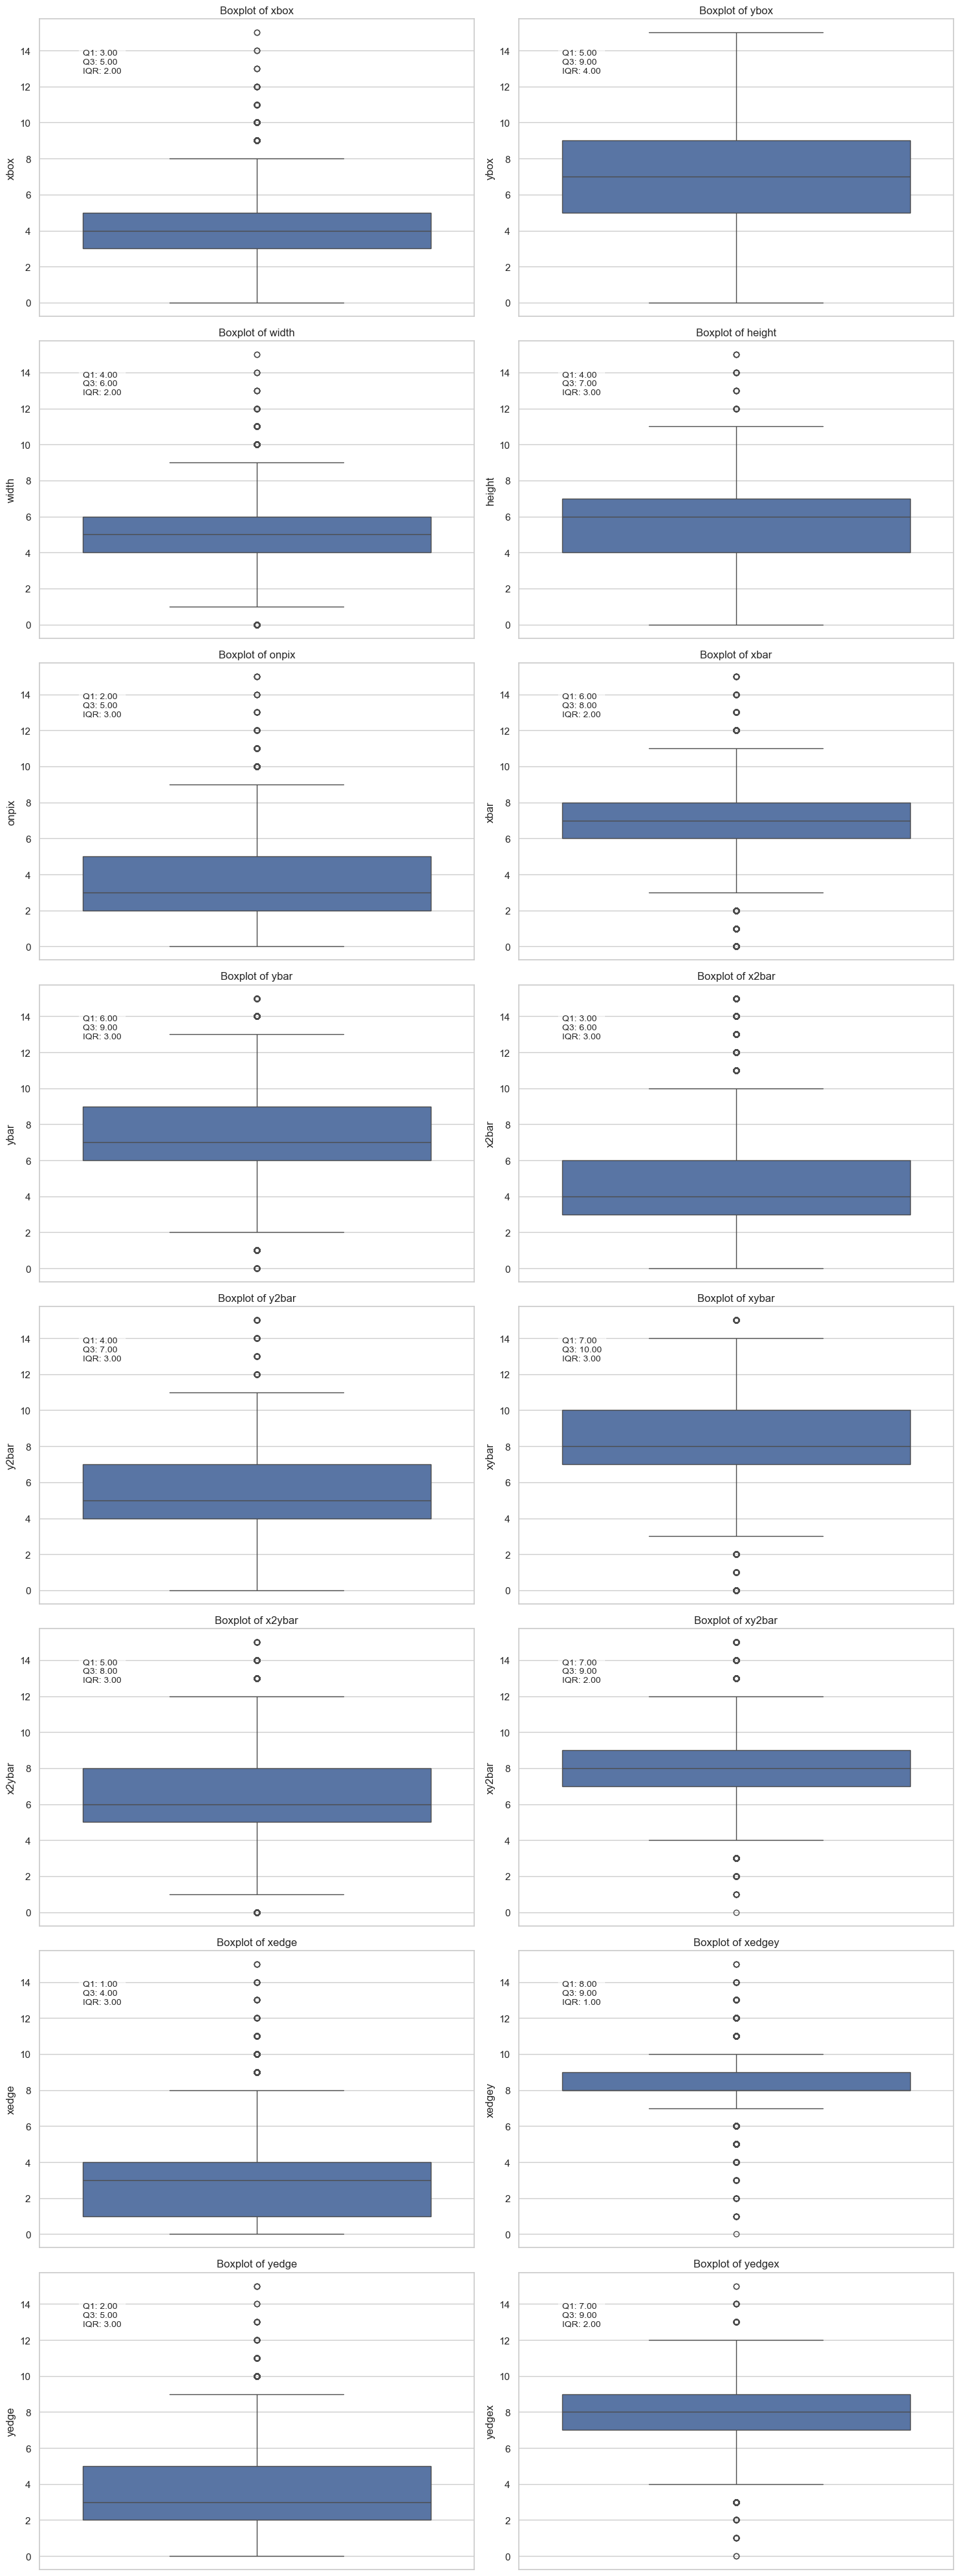

In [65]:
# Set style for seaborn
sns.set(style="whitegrid")

# Function to plot boxplots for numerical columns and show IQR and outliers
def plot_boxplots(data, numerical_cols):
    num_cols = len(numerical_cols)
    cols = 2  # Number of columns for subplots
    rows = (num_cols + cols - 1) // cols  # Calculate rows based on number of numerical columns
    
    plt.figure(figsize=(15, 5 * rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(y=data[col])  # Removed palette to avoid the warning
        plt.title(f'Boxplot of {col}')
        
        # Calculate Q1, Q3, and IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Annotate with IQR, Q1, and Q3
        plt.text(0.1, 0.9, f'Q1: {Q1:.2f}\nQ3: {Q3:.2f}\nIQR: {IQR:.2f}', 
                 horizontalalignment='left', 
                 verticalalignment='top', 
                 transform=plt.gca().transAxes, 
                 bbox=dict(facecolor='white', alpha=0.6),
                 fontsize=10)
        
    plt.tight_layout()
    plt.show()

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots
plot_boxplots(df, numerical_cols)


In [73]:

    # Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols    
    

Index(['letter'], dtype='object')

##### Standardization of Numerical Variables
●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
●	Steps:
	Explain the concept of standardization (z-score normalization).
	Standardize the numerical columns using the formula: z=x-mu/sigma
	
	Show before and after comparisons of the data distributions.


In [85]:
import pandas as pd
import numpy as np

#select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [87]:
# Standardization (z-score normalization)
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()

    df[col + '_standardized'] = (df[col] - mean) / std


In [89]:
# Before and after comparison
print("Before Standardization:")
print(df[numerical_cols].describe())

print("\nAfter Standardization:")
standardized_cols = [col + '_standardized' for col in numerical_cols]
print(df[standardized_cols].describe())


Before Standardization:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495426  

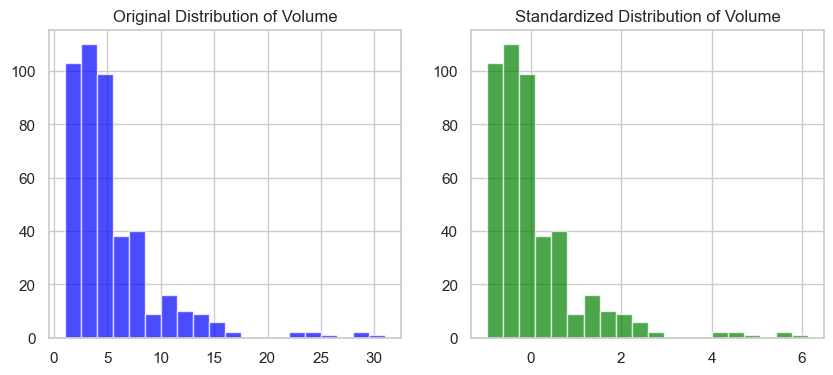

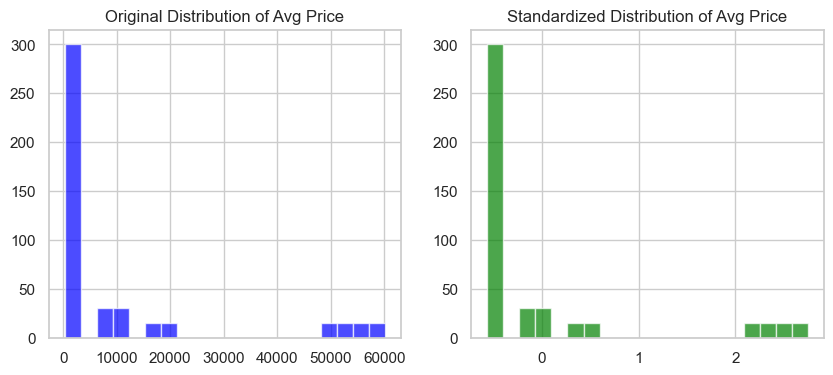

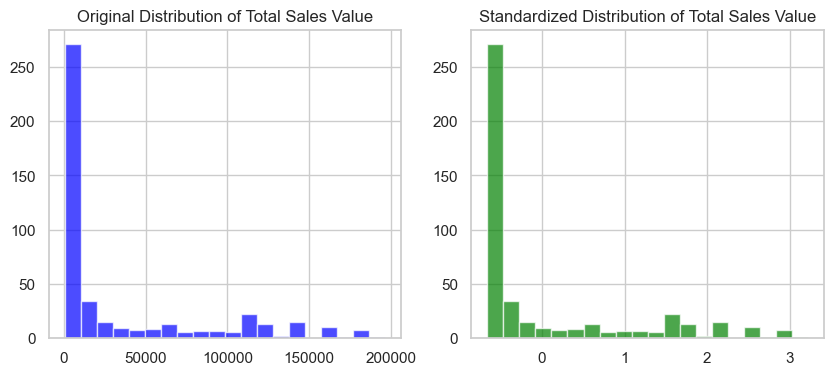

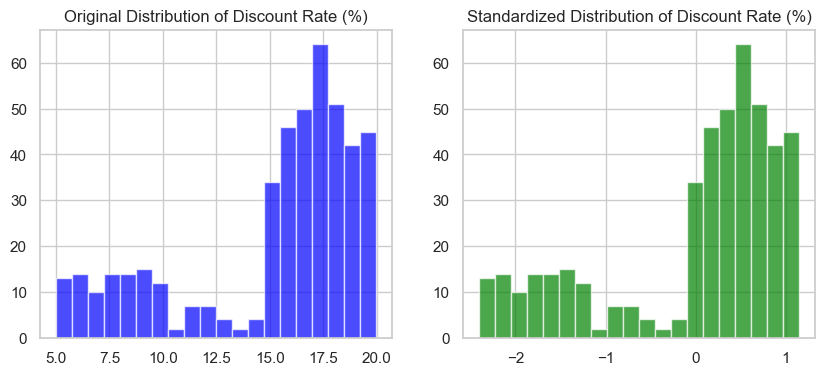

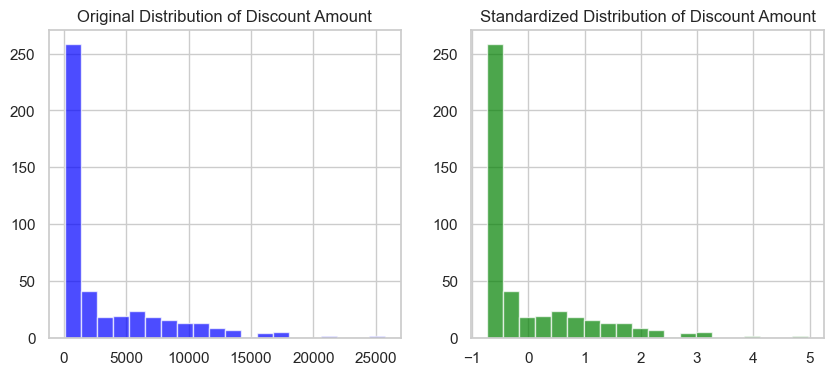

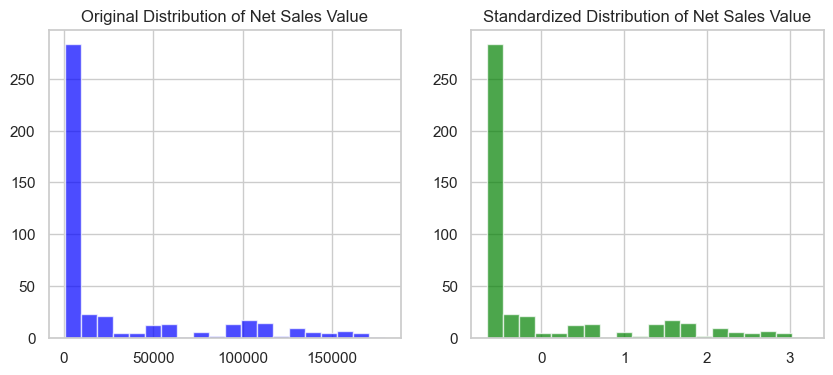

In [91]:
import matplotlib.pyplot as plt

# Plot the distributions
for col in numerical_cols:
    plt.figure(figsize=(10,4))

    # Original distribution
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='blue', alpha=0.7)
    plt.title(f'Original Distribution of {col}')
    
    # Standardized distribution
    plt.subplot(1, 2, 2)
    plt.hist(df[col + '_standardized'], bins=20, color='green', alpha=0.7)
    plt.title(f'Standardized Distribution of {col}')
    
    plt.show()


##### Conversion of Categorical Data into Dummy Variables
●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.
●	Steps:
	Discuss the need for converting categorical data into dummy variables (one-hot encoding).
	Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
	Display a portion of the transformed dataset.


In [96]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [ ]:
# Apply one-hot encoding
sales_data_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows of the transformed dataset
print(sales_data_encoded.head())
